In [36]:
from bs4 import BeautifulSoup
import pandas as pd
import csv
import os
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pykrx import stock
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_rows', None)

In [2]:
#----------Ticker별 2022년 주가 데이터 ----------------
price = pd.read_pickle("./datasets/stock_prcie.pkl")

#----------Ticker별 2022년 연 수익률, 변동률 ----------------
kospi200 = pd.read_pickle("./datasets/ret_std.pkl")

#----------군집별 데이터 불러오기 ----------------
for i in range(4):
    globals()[f'cluster_{i}'] = pd.read_pickle(f"./datasets/cluster_{i}.pkl")
    globals()[f'cluster_{i}'].reset_index(drop=True, inplace=True)

# 그룹별 연 수익률과 변동성 확인

## 0번 그룹

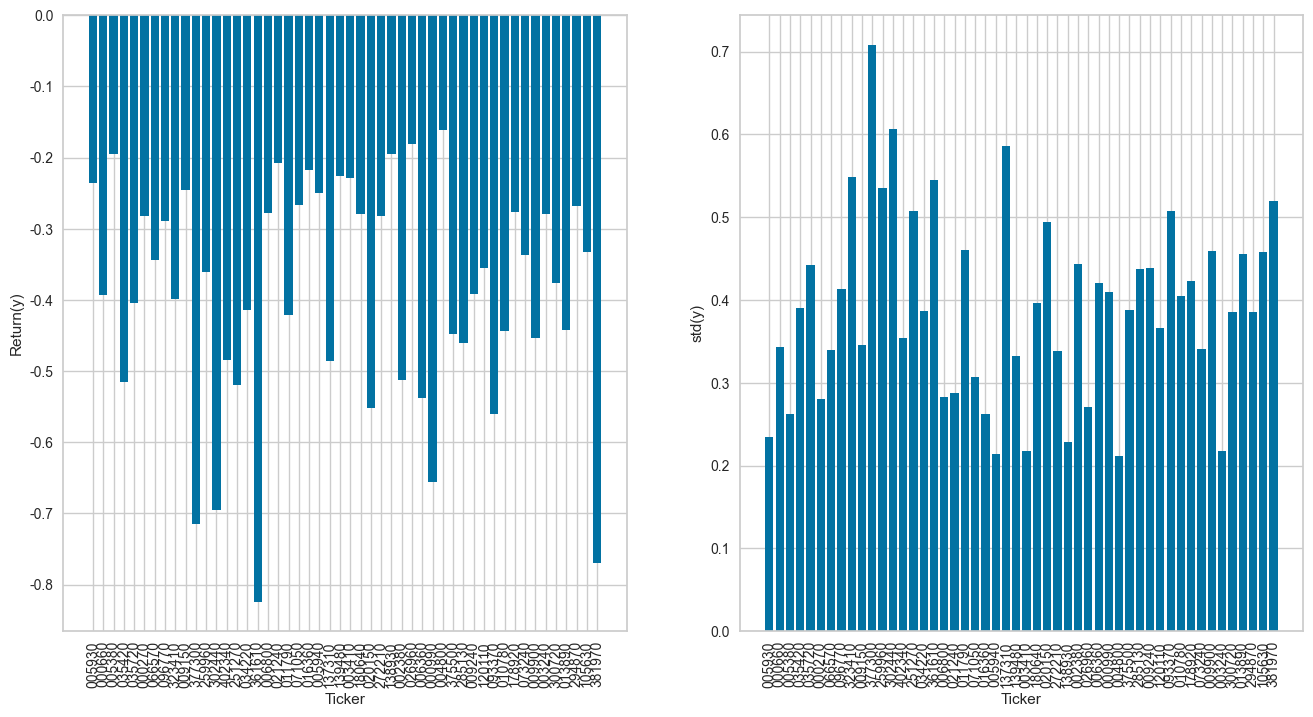

In [3]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.bar(kospi200[kospi200['Cluster'] == 0].index, kospi200[kospi200['Cluster'] == 0]["return(y)"])
plt.ylabel('Return(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.bar(kospi200[kospi200['Cluster'] == 0].index, kospi200[kospi200['Cluster'] == 0]["std(y)"])
plt.ylabel('std(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.show()

## 1번 그룹

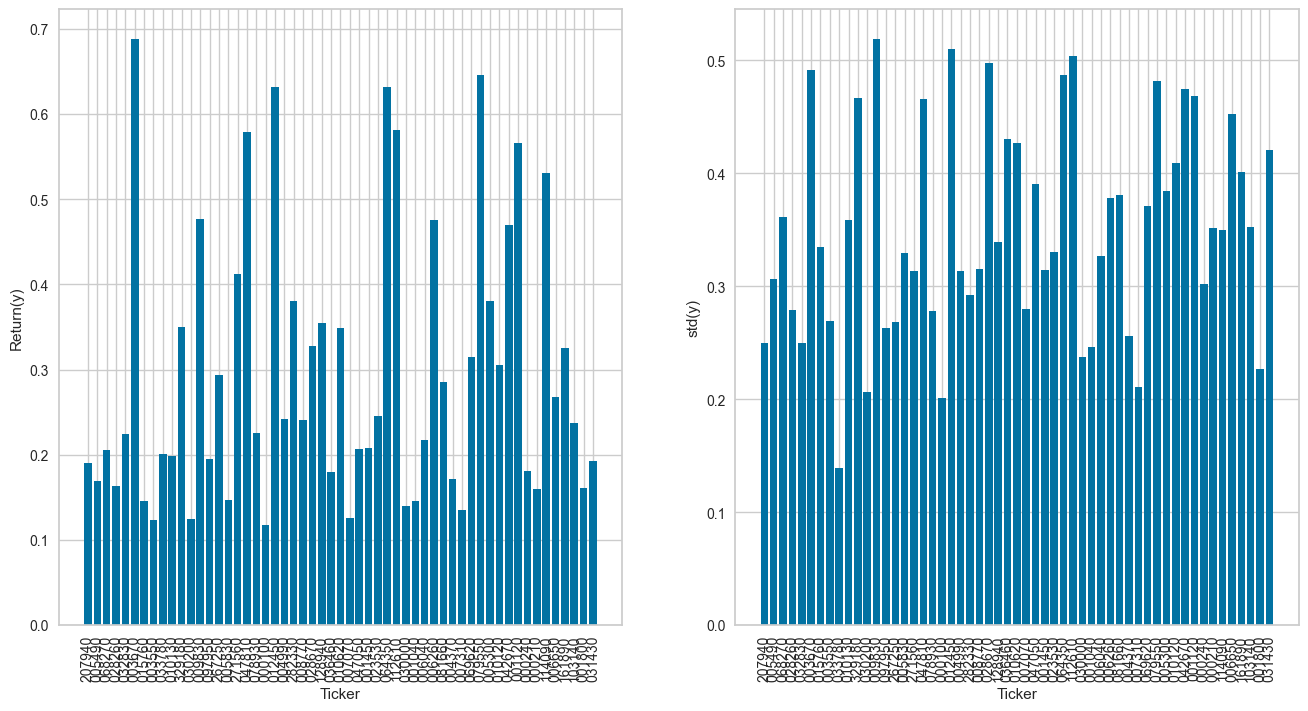

In [4]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.bar(kospi200[kospi200['Cluster'] == 1].index, kospi200[kospi200['Cluster'] == 1]["return(y)"])
plt.ylabel('Return(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.bar(kospi200[kospi200['Cluster'] == 1].index, kospi200[kospi200['Cluster'] == 1]["std(y)"])
plt.ylabel('std(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.show()

## 2번 그룹

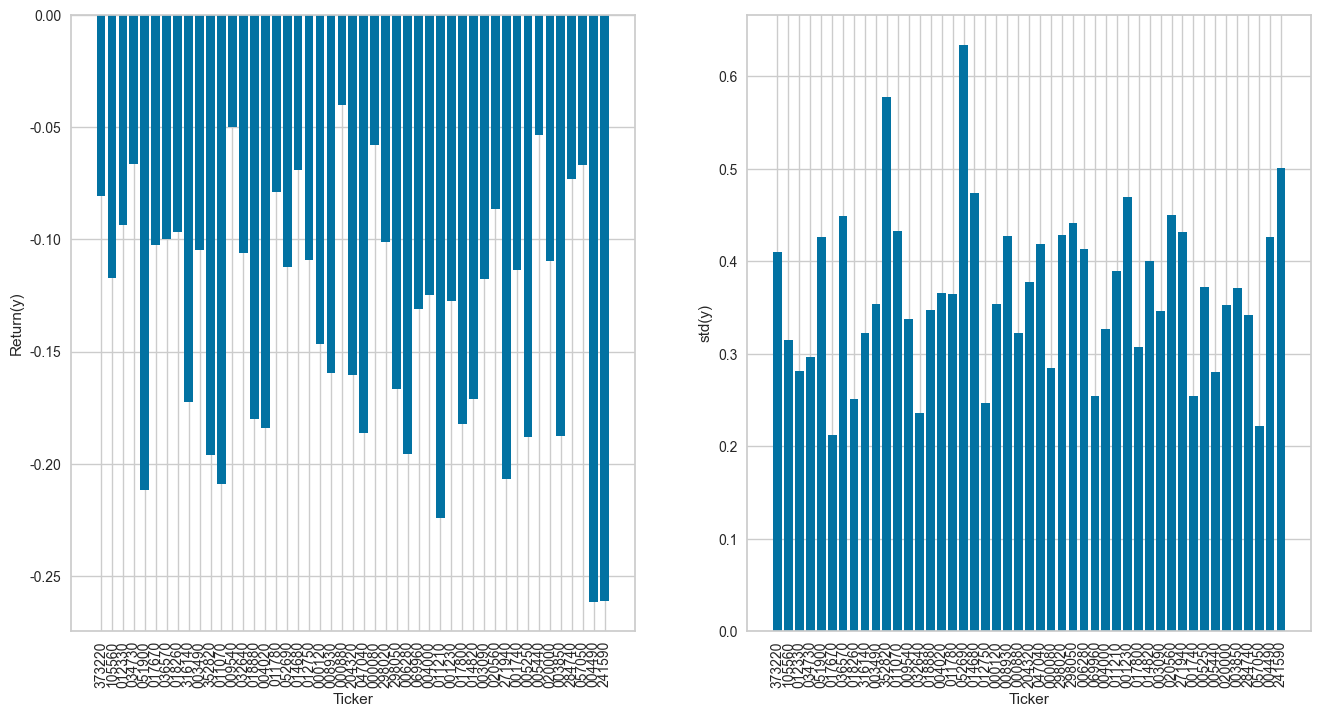

In [5]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.bar(kospi200[kospi200['Cluster'] == 2].index, kospi200[kospi200['Cluster'] == 2]["return(y)"])
plt.ylabel('Return(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.bar(kospi200[kospi200['Cluster'] == 2].index, kospi200[kospi200['Cluster'] == 2]["std(y)"])
plt.ylabel('std(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.show()

## 3번 그룹

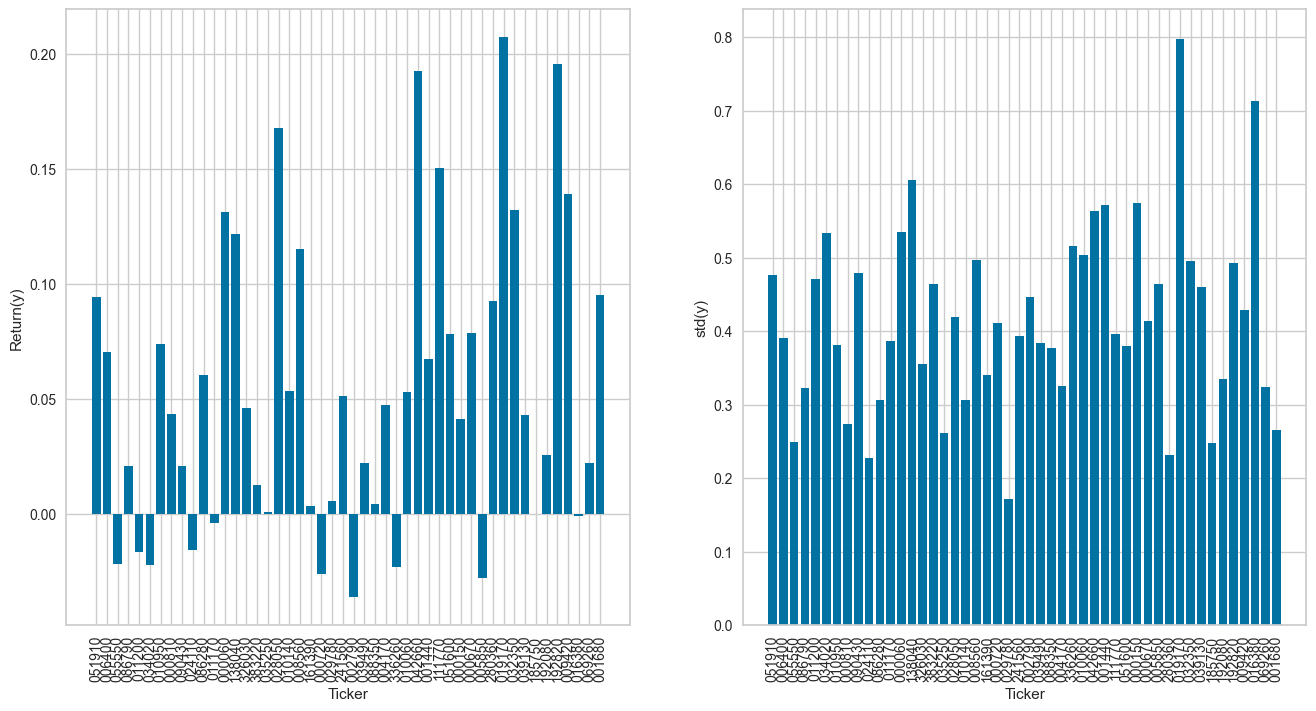

In [6]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.bar(kospi200[kospi200['Cluster'] == 3].index, kospi200[kospi200['Cluster'] == 3]["return(y)"])
plt.ylabel('Return(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.bar(kospi200[kospi200['Cluster'] == 3].index, kospi200[kospi200['Cluster'] == 3]["std(y)"])
plt.ylabel('std(y)')
plt.xlabel('Ticker')
plt.xticks(rotation = 90)

plt.show()

* 1번 그룹이 가장 수익률이 높고 변동성이 낮음을 확인

# 1번 그룹의 데이터 분석

## 1번 그룹의 2022년 주가 데이터

In [7]:
df_list = []

for i in cluster_1["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        df_list.append(df)
    except:
        pass

df_price = pd.concat(df_list, axis=1)
df_price.head()
        

,207940,005490,068270,028260,032830,003670,015760,003550,033780,010130,...,001120,000240,000210,114090,006650,280360,161890,103140,001800,031430
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,888000.0,275575.56250,186607.156250,117500.0,64800.0,142000.0,22000.0,82400.0,78400.0,511000.0,...,27000.0,15700.0,63800.0,13250.0,184500.0,120500.0,40000.0,32500.0,15750.0,29100.0
2022-01-05,861000.0,284232.34375,179891.218750,117500.0,65700.0,138000.0,21800.0,81400.0,78500.0,503000.0,...,26350.0,15550.0,64600.0,13050.0,187000.0,122000.0,39050.0,32250.0,15650.0,28400.0
2022-01-06,838000.0,292889.18750,173654.984375,115000.0,65400.0,134000.0,21450.0,80800.0,78700.0,509000.0,...,26000.0,15200.0,64900.0,13000.0,181500.0,121500.0,38850.0,32550.0,15450.0,28000.0
2022-01-07,844000.0,293370.12500,175094.109375,116500.0,65800.0,133500.0,21650.0,81600.0,78400.0,514000.0,...,26100.0,15250.0,66200.0,13250.0,194000.0,121500.0,39300.0,32450.0,15400.0,28100.0
2022-01-10,836000.0,292408.25000,179411.500000,115000.0,67400.0,130500.0,21500.0,80800.0,78500.0,514000.0,...,25700.0,15050.0,66100.0,13250.0,193500.0,123000.0,38650.0,32250.0,15600.0,26600.0


## 1번 그룹을 WICS(Wise Industry Classification Standard)로 다시 한번 분류
* 에너지, 소재, 산업재, 경기관련소비재, 필수소비재, 건강관리, 금융, IT, 커뮤니케이션서비스, 유틸리티로 대분류가 이루어진다.

In [8]:
# 에너지
energy = ["포스코케미칼", "한화솔루션", "고려아연", "DL", "대한유화", "풍산", "POSCO홀딩스"]

# 소재
metarial = ["HD현대", "GS", "씨에스윈드"]

# 산업재
industrial_goods = ["현대중공업", "삼성물산", "LG","한국항공우주","한화에어로스페이스","LIG넥스원","팬오션","현대미포조선","포스코인터내셔널","현대로템","CJ", "LS","LS ELECTRIC","현대두산인프라코어","LX인터내셔널"]

# 경기관련소비재
economic_goods = ["BGF리테일","GS리테일","롯데쇼핑","호텔신라","휠라홀딩스","한국앤컴퍼니","GKL","한국콜마","신세계인터내셔날"]

# 필수소비재
essential_goods = ["KT&G","CJ제일제당","오리온","롯데지주","동원산업","농심","오뚜기","롯데칠성","롯데제과","오리온홀딩스"] 

# 건강관리
health = ["삼성바이오로직스", "셀트리온", "유한양행", "한미약품", "대웅제약"]

# 금융
financial = ["삼성생명", "DB손해보험", "현대해상"]

# 커뮤니케이션서비스
communication = ["KT", "제일기획"]

# 유틸리티
utility = ["한국전력", "한국가스공사"]

In [9]:
cluster_1["wics"] = 0
for i in energy:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "에너지"

for i in metarial:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "소재"

for i in industrial_goods:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "산업재"

for i in economic_goods:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "경기관련소비재"

for i in essential_goods:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "필수소비재"

for i in health:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "건강관리"

for i in financial:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "금융"

for i in communication:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "커뮤니케이션서비스"

for i in utility:
    cluster_1.loc[cluster_1["Name"] == i, "wics"] = "유틸리티"

In [10]:
cluster_1.head()

,labels,Symbol,Name,Sector,wics
0,1,207940,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업,건강관리
1,1,005490,POSCO홀딩스,1차 철강 제조업,에너지
2,1,068270,셀트리온,기초 의약물질 및 생물학적 제제 제조업,건강관리
3,1,028260,삼성물산,기타 전문 도매업,산업재
4,1,032830,삼성생명,보험업,금융


## WICS별 PLOT차트

### 에너지

In [11]:
energy_list = []

for i in cluster_1[cluster_1["wics"] == "에너지"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        energy_list.append(df)
    except:
        pass

energy_price = pd.concat(energy_list, axis=1)
energy_price.columns = cluster_1[cluster_1["wics"] == "에너지"]["Name"]
energy_price.head()

Name,POSCO홀딩스,포스코케미칼,고려아연,한화솔루션,DL,대한유화,풍산
Date,,,,,,,
2022-01-04,275575.56250,142000.0,511000.0,35650.0,63800.0,184500.0,32500.0
2022-01-05,284232.34375,138000.0,503000.0,35000.0,64600.0,187000.0,32250.0
2022-01-06,292889.18750,134000.0,509000.0,34250.0,64900.0,181500.0,32550.0
2022-01-07,293370.12500,133500.0,514000.0,36600.0,66200.0,194000.0,32450.0
2022-01-10,292408.25000,130500.0,514000.0,38250.0,66100.0,193500.0,32250.0


### 소재

In [13]:
metarial_list = []

for i in cluster_1[cluster_1["wics"] == "소재"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        metarial_list.append(df)
    except:
        pass

metarial_price = pd.concat(metarial_list, axis=1)
metarial_price.columns = cluster_1[cluster_1["wics"] == "소재"]["Name"]
metarial_price.head()

Name,HD현대,GS,씨에스윈드
Date,,,
2022-01-04,54099.191406,39550.0,65539.750000
2022-01-05,54690.437500,39550.0,63255.789062
2022-01-06,54000.648438,40050.0,59382.984375
2022-01-07,54690.437500,39700.0,62163.457031
2022-01-10,54296.273438,39800.0,61865.550781


### 산업재

In [15]:
industrial_list = []

for i in cluster_1[cluster_1["wics"] == "산업재"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        industrial_list.append(df)
    except:
        pass

industrial_price = pd.concat(industrial_list, axis=1)
industrial_price.columns = cluster_1[cluster_1["wics"] == "산업재"]["Name"]
industrial_price.head()

Name,삼성물산,LG,현대중공업,한국항공우주,한화에어로스페이스,팬오션,현대미포조선,포스코인터내셔널,현대로템,CJ,LS,LIG넥스원,LS ELECTRIC,현대두산인프라코어,LX인터내셔널
Date,,,,,,,,,,,,,,,
2022-01-04,117500.0,82400.0,101500.0,33000.0,50400.0,5580.0,76100.0,23350.0,21300.0,84000.0,55000.0,70900.0,55700.0,7160.0,27000.0
2022-01-05,117500.0,81400.0,104000.0,32550.0,50900.0,5610.0,79800.0,23200.0,21350.0,82900.0,54000.0,67600.0,55100.0,7280.0,26350.0
2022-01-06,115000.0,80800.0,111000.0,31950.0,49400.0,5670.0,81800.0,23050.0,21150.0,81300.0,54000.0,65400.0,54900.0,6980.0,26000.0
2022-01-07,116500.0,81600.0,112000.0,33800.0,50100.0,5640.0,82400.0,22850.0,21400.0,81900.0,54500.0,66200.0,54900.0,7010.0,26100.0
2022-01-10,115000.0,80800.0,111500.0,33800.0,51100.0,5800.0,81700.0,22850.0,21550.0,81500.0,54700.0,65800.0,55200.0,7000.0,25700.0


### 경기관련소비재

In [17]:
economic_list = []

for i in cluster_1[cluster_1["wics"] == "경기관련소비재"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        economic_list.append(df)
    except:
        pass

economic_price = pd.concat(economic_list, axis=1)
economic_price.columns = cluster_1[cluster_1["wics"] == "경기관련소비재"]["Name"]
economic_price.head()

Name,BGF리테일,호텔신라,GS리테일,롯데쇼핑,휠라홀딩스,한국앤컴퍼니,GKL,한국콜마,신세계인터내셔날
Date,,,,,,,,,
2022-01-04,142000.0,77700.0,30050.0,88400.0,34404.003906,15700.0,13250.0,40000.0,29100.0
2022-01-05,139500.0,76900.0,29750.0,87400.0,34355.273438,15550.0,13050.0,39050.0,28400.0
2022-01-06,141500.0,76900.0,29650.0,87600.0,32990.808594,15200.0,13000.0,38850.0,28000.0
2022-01-07,140000.0,77300.0,29850.0,87700.0,33234.464844,15250.0,13250.0,39300.0,28100.0
2022-01-10,139000.0,74400.0,29350.0,86800.0,32747.156250,15050.0,13250.0,38650.0,26600.0


### 필수소비재

In [19]:
essential_list = []

for i in cluster_1[cluster_1["wics"] == "필수소비재"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        essential_list.append(df)
    except:
        pass

essential_price = pd.concat(essential_list, axis=1)
essential_price.columns = cluster_1[cluster_1["wics"] == "필수소비재"]["Name"]
essential_price.head()

Name,KT&G,CJ제일제당,오리온,롯데지주,동원산업,농심,오뚜기,롯데칠성,롯데제과,오리온홀딩스
Date,,,,,,,,,,
2022-01-04,78400.0,376580.78125,102500.0,29800.0,44900.0,311500.0,453000.0,132500.0,120500.0,15750.0
2022-01-05,78500.0,375092.34375,102500.0,29650.0,44400.0,309500.0,448000.0,131000.0,122000.0,15650.0
2022-01-06,78700.0,371619.28125,102000.0,29400.0,45100.0,317500.0,440000.0,131000.0,121500.0,15450.0
2022-01-07,78400.0,377573.09375,106000.0,29300.0,45300.0,322000.0,448500.0,136000.0,121500.0,15400.0
2022-01-10,78500.0,382038.50000,107000.0,29000.0,45800.0,323000.0,463000.0,137000.0,123000.0,15600.0


### 건강관리

In [21]:
health_list = []

for i in cluster_1[cluster_1["wics"] == "건강관리"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        health_list.append(df)
    except:
        pass

health_price = pd.concat(health_list, axis=1)
health_price.columns = cluster_1[cluster_1["wics"] == "건강관리"]["Name"]
health_price.head()

Name,삼성바이오로직스,셀트리온,유한양행,한미약품,대웅제약
Date,,,,,
2022-01-04,888000.0,186607.156250,59238.093750,272549.031250,147500.0
2022-01-05,861000.0,179891.218750,58190.476562,267156.875000,144500.0
2022-01-06,838000.0,173654.984375,57238.093750,256372.546875,141000.0
2022-01-07,844000.0,175094.109375,57904.761719,258823.531250,143000.0
2022-01-10,836000.0,179411.500000,57619.046875,257352.937500,144500.0


### 금융

In [23]:
financial_list = []

for i in cluster_1[cluster_1["wics"] == "금융"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        financial_list.append(df)
    except:
        pass

financial_price = pd.concat(financial_list, axis=1)
financial_price.columns = cluster_1[cluster_1["wics"] == "금융"]["Name"]
financial_price.head()

Name,삼성생명,DB손해보험,현대해상
Date,,,
2022-01-04,64800.0,57000.0,24050.0
2022-01-05,65700.0,59300.0,24950.0
2022-01-06,65400.0,60300.0,25300.0
2022-01-07,65800.0,60600.0,25450.0
2022-01-10,67400.0,64400.0,26400.0


### 커뮤니케이션서비스

In [25]:
communication_list = []

for i in cluster_1[cluster_1["wics"] == "커뮤니케이션서비스"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        communication_list.append(df)
    except:
        pass

communication_price = pd.concat(communication_list, axis=1)
communication_price.columns = cluster_1[cluster_1["wics"] == "커뮤니케이션서비스"]["Name"]
communication_price.head()

Name,KT,제일기획
Date,,
2022-01-04,30100.0,22200.0
2022-01-05,30800.0,22700.0
2022-01-06,30250.0,22450.0
2022-01-07,30250.0,22450.0
2022-01-10,30800.0,22500.0


### 유틸리티

In [27]:
utility_list = []

for i in cluster_1[cluster_1["wics"] == "유틸리티"]["Symbol"]:
    try:
        df = price[i]
        df = pd.DataFrame(df)
        df.columns = [i]
        utility_list.append(df)
    except:
        pass

utility_price = pd.concat(utility_list, axis=1)
utility_price.columns = cluster_1[cluster_1["wics"] == "유틸리티"]["Name"]
utility_price.head()

Name,한국전력,한국가스공사
Date,,
2022-01-04,22000.0,38250.0
2022-01-05,21800.0,37950.0
2022-01-06,21450.0,37500.0
2022-01-07,21650.0,37500.0
2022-01-10,21500.0,37150.0
